<a href="https://colab.research.google.com/github/Anweshasen98/Image-Classification-on-the-MNIST-Handwritten-Digits-Recognition-Dataset/blob/main/Model_A_Recurring_Fully_Connected_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model A- MNIST Classifier With Fully Connected Neural Network**

FULLY CONNECTED NEURAL NETWORK

In [ ]:
#IMPORT DEPENDENCIES

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Splitting the dataset

(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#Check dimensions of any element of training data

print(X_train[0].shape)

#It has 28 rows and 28 Columns

(28, 28)


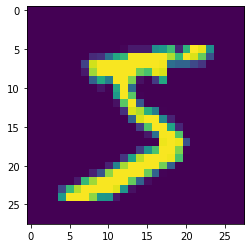

In [ ]:
plt.imshow(X_train[0])

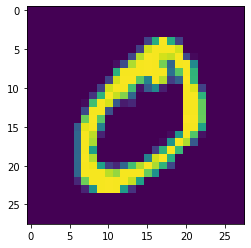

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [ ]:
#NORMALIZING INPUT DATA

X_train = X_train/255.0
X_test = X_test/255.0

# CALLBACK

In [ ]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")> ACCURACY_THRESHOLD):
      print("\nReached %2.2f%% accuracy so cancelling training!" % (ACCURACY_THRESHOLD*100))
      self.model.stop_training = True


callbacks = myCallback()



# MODEL WITH DENSE LAYERS

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  #It will flatten the input shape to 60000, 784
    keras.layers.Dense(784, activation='relu'),  #First Hidden Layer with activation relu
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dense_10 (Dense)            (None, 100)               40100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 970,550
Trainable params: 970,550
Non-trainable params: 0
_________________________________________________________________


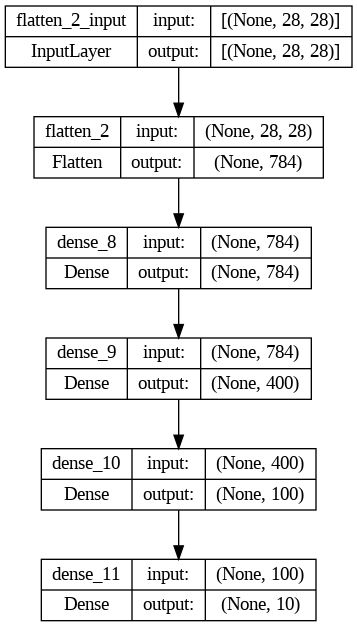

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model,'model.png', show_shapes=True, show_layer_names=True)

In [ ]:
ACCURACY_THRESHOLD =  .99

training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[callbacks])


Epoch 1/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1901 - accuracy: 0.9426 - val_loss: 0.1056 - val_accuracy: 0.9685
Epoch 2/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0894 - accuracy: 0.9721 - val_loss: 0.0928 - val_accuracy: 0.9706
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0747 - val_accuracy: 0.9784
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0685 - val_accuracy: 0.9806
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0673 - val_accuracy: 0.9820
Epoch 6/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9906
Reached 99.00% accuracy so cancelling training!
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0764 - val_accur

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss : {loss}, \nAccuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9810
Loss : 0.07637449353933334, 
Accuracy: 0.9810000061988831


## Task 1(b)PERFORMANCE EVALUATION

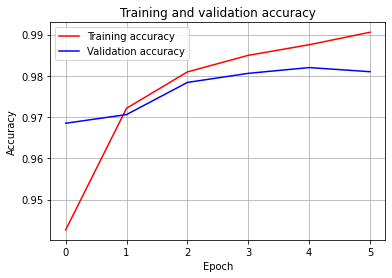

<Figure size 432x288 with 0 Axes>

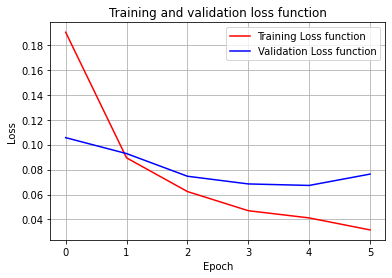

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Training and Testing curves

import matplotlib.pyplot as plt

history = training.history

def summarize_diagnostics(history):
  acc = history['accuracy']
  loss = history['loss']
  val_acc = history['val_accuracy']
  val_loss = history['val_loss']

  epochs = range(len(acc))


  plt.grid()
  plt.plot(acc, 'r', label='Training accuracy')
  plt.plot(val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.figure()
  plt.show()

  plt.grid()
  plt.plot(loss, 'r', label='Training Loss function')
  plt.plot(val_loss, 'b', label='Validation Loss function')
  plt.title('Training and validation loss function')
  plt.legend(loc=0)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.figure()
  plt.show()


summarize_diagnostics(history)

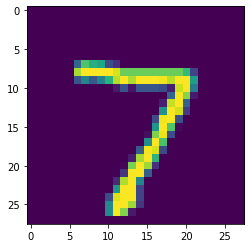

In [ ]:
plt.imshow(X_test[0])

In [ ]:
#PREDICT

classification = model.predict(X_test)
classification[0]

313/313 [==============================] - 1s 2ms/step


array([1.42928529e-12, 2.61578403e-08, 7.91589017e-10, 1.11293225e-10,
       3.20972005e-09, 1.49873267e-12, 2.72079754e-17, 9.99999106e-01,
       1.01615591e-11, 7.99681004e-07], dtype=float32)

In [ ]:
np.argmax(classification[0])

7

In [ ]:
y_test[0]

7

In [ ]:
y_pred = []

for i in classification:
    y_pred.append(np.argmax(i))

y_pred[:5]

[7, 2, 1, 0, 4]

In [ ]:
pred=[np.argmax(i) for i in classification]

pred[ :5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(y_test, pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    1,    0,    1,    0,    0,    0,    1,    0],
       [   1, 1123,    3,    1,    0,    3,    1,    1,    2,    0],
       [   3,    0, 1011,    2,    4,    0,    1,    5,    6,    0],
       [   2,    0,    2,  986,    0,    4,    0,    5,    6,    5],
       [   2,    3,    1,    0,  958,    0,    4,    1,    0,   13],
       [   2,    1,    0,    6,    1,  875,    2,    1,    1,    3],
       [   6,    3,    0,    0,    7,    4,  933,    0,    4,    1],
       [   1,    6,    6,    0,    0,    0,    0, 1005,    4,    6],
       [   1,    0,    1,    1,    4,    4,    0,    3,  957,    3],
       [   2,    4,    0,    2,    8,    2,    0,    3,    3,  985]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

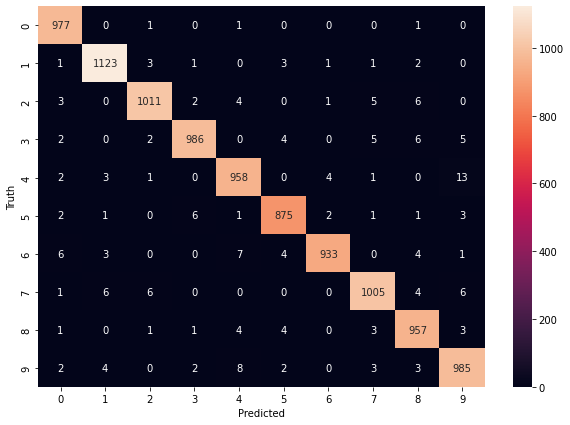

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

End of Task 1(a)